<h1><center> Project 1 - Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
import re

<h1> Gathering data </h1>

We will gather data from three sources:
1) From csv file given to us

2) From tsv file in the server

3) From Twitter API

### 1) Gathering data from csv file.

In [2]:
twitter_data = pd.read_csv(r'twitter-archive-enhanced.csv' )

###### Test

In [3]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2) Gathering data from tsv file on the server

In [4]:
url = r'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(r'image_predictions.tsv', mode='wb+') as f:
    f.write(r.content)

In [5]:
twitter_image_predicitons = pd.read_csv(r'image_predictions.tsv', delimiter='\t')

##### Test

In [6]:
twitter_image_predicitons.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3) Gathering data from Twitter API - api script is in the different notebook
    

In [7]:
with open(r'tweet_json.txt', 'r') as file:
    f = file.read()

In [8]:
twitter_api_data = pd.read_json(f, orient ='index',convert_axes=False)

##### Test

In [9]:
twitter_api_data.head()

,favorite_count,retweet_count
892420643555336193,33702.0,6976.0
892177421306343426,29231.0,5278.0
891815181378084864,21975.0,3466.0
891689557279858688,36778.0,7190.0
891327558926688256,35164.0,7723.0


<h2> Assesment definitions

<h3> Problems with data

<b>Dirty Data </b>- 	Data that has issues with data content including missing data, invalid data, inaccurate date or inconsistent data
<br><b>Messy Data</b> -	Data that has issues with its structure (columns, rows or table)

<h3> Data quality dimension </h3>

<b>Completeness:</b> do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
<b><br><br>Validity:</b> we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
<b><br><br>Accuracy:</b> inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
<b><br><br>Consistency:</b> inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing.Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

#### Tidy data requirements:

1) Each variable forms a column.

2) Each observation forms a row.

3) Each type of observational unit forms a table.

<h3> Ways of assesing the data

<b>Visual assessment:</b> each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
<br><br><b>Programmatic assessment:</b> pandas' functions and/or methods are used to assess the data.

<h1> Data assesment

### 1) Assesment of twitter_data table

In [10]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### To do:
- Change 'doggo floofer pupper puppo' to dog categories in twitter_data
- Index as a unique identifier for the merged dataframe

<AxesSubplot:>

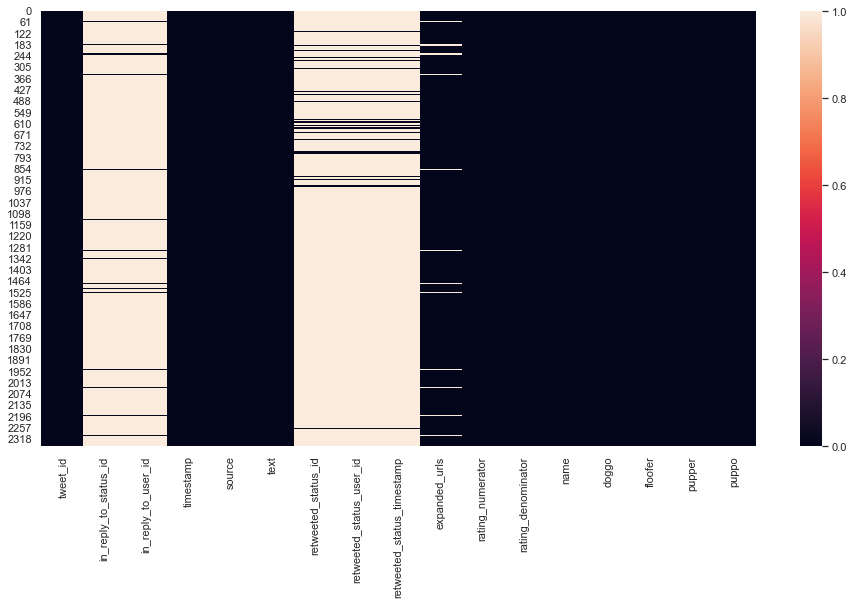

In [11]:
sns.heatmap(twitter_data.isnull())

##### To do:
- fill expanded_urls where value is missing
- delete in_reply columns and retweeted columns since nearly no records

In [12]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### To do:
-  Change timestamps to datetime

In [13]:
twitter_data['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

##### To do:
-  Extract the sources from source column

In [14]:
twitter_data['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [15]:
twitter_data['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

##### To do:
-  Standardize the numerators and delete denominators as all will be 10 

In [16]:
print('\033[1m'+'For the following tweets the name is wronge, but it is present in the tweet\' text:'+'\033[0m')

for idx, val in zip(twitter_data['text'].index, twitter_data['text'].values):
    if 'named' in val:
        print(twitter_data.loc[idx,'tweet_id'] , twitter_data.loc[idx, 'name'])

For the following tweets the name is wronge, but it is present in the tweet' text:
798628517273620480 None
675706639471788032 a
673636718965334016 a
671743150407421952 a
671147085991960577 a
670427002554466305 a
670361874861563904 a
670303360680108032 a
669923323644657664 a
669564461267722241 a
669363888236994561 None
668955713004314625 a
668636665813057536 an
668507509523615744 a
668268907921326080 None
668171859951755264 a
667861340749471744 a
667773195014021121 a
667538891197542400 a
667509364010450944 None
667470559035432960 a
666983947667116034 a
666781792255496192 a
666701168228331520 a


##### To do:
- extract some names from text where phrase 'named' is used

In [17]:
twitter_data['name'].apply(lambda x: x[0]).unique()

array(['P', 'T', 'A', 'D', 'F', 'N', 'J', 'Z', 'C', 'K', 'B', 'S', 'O',
       'R', 'G', 's', 'M', 'W', 'L', 'E', 'Y', 'a', 'V', 'H', 'q', 'Q',
       'I', 'n', 'o', 'i', 'm', 'v', 'j', 'h', 'g', 't', 'u', 'U', 'b',
       'l'], dtype=object)

##### To do:
- make all names start with capital letter

In [18]:
twitter_data['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

##### To do:
- replace 'a' and 'None' with np.nan()

### 2) Assesment of twitter_api_data table

In [19]:
twitter_api_data.head()

,favorite_count,retweet_count
892420643555336193,33702.0,6976.0
892177421306343426,29231.0,5278.0
891815181378084864,21975.0,3466.0
891689557279858688,36778.0,7190.0
891327558926688256,35164.0,7723.0


##### To do:
- Merge twitter_data and twitter_api_data

In [20]:
twitter_api_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   favorite_count  2327 non-null   float64
 1   retweet_count   2327 non-null   float64
dtypes: float64(2)
memory usage: 55.2+ KB


##### To do:
- change favourite_count and retweet_count to int

<AxesSubplot:>

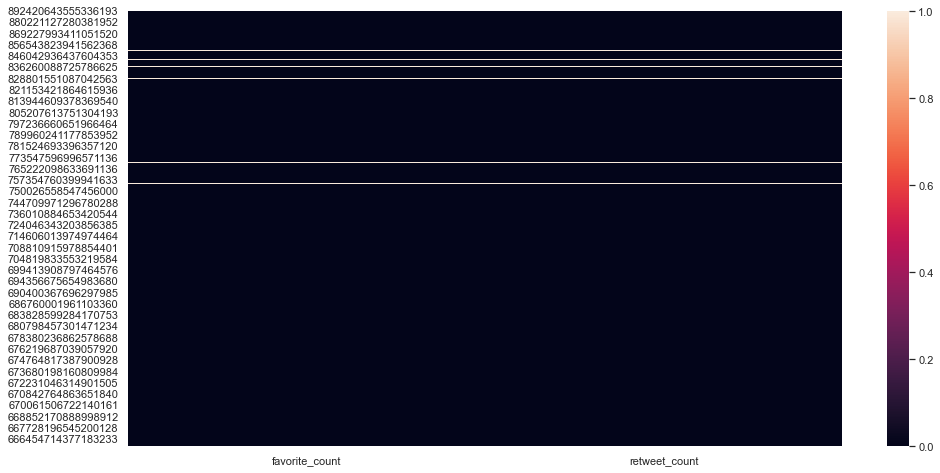

In [21]:
sns.heatmap(twitter_api_data.isna())

##### To do:
- delete tweets with favourite_count missing data as they were probably deleted irl

### 3) Assesment of twitter_image_predicitons table

In [22]:
twitter_image_predicitons.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### To do:
- set_index to tweets_id
- uniform the predictions by lowering all words

## Data Assesment Summary

### Tideness issues
- Change 'doggo	floofer	pupper	puppo' to dog categories in twitter_data
- Merge twitter_data and twitter_api_data

###  Data quality issues 
##### twitter_data table (merged with twitter_api_data)

- Index as a unique identifier for the merged dataframe
- Delete in_reply columns and retweeted columns since nearly no records
- Change timestamps to datetime in twitter_data
- Extract the sources from source column
- Uniform the predictions by lowering all words
- Standardize the numerators  and delete denominators as all will be 10 
- Extract some names from text where phrase 'named' is used
- Replace 'a' and 'None' with np.nan()
- Make all names start with capital letter
- Fill expanded_urls where value is missing
- Set_index to tweets_id
- Delete tweets with favourite_count missing data as they were probably deleted irl
- Change favourite_count and retweet_count to int

##### twitter_image_predicitons table
- Uniform the predictions by lowering all words
- Set_index to tweets_id


<h1> Cleaning Data

### Copying the dataframes

In [23]:
twitter_data_unclean = twitter_data.copy()
twitter_image_predicitons_unclean = twitter_image_predicitons.copy()
twitter_api_data_unclean = twitter_api_data.copy()

### Tideness issues first

#### twitter_data: Change 'doggo floofer pupper puppo' to dog categories in twitter_data

##### Define 
Extract the dog meme name from twitter_data['text'] and drop the leftover columns

##### Code

In [24]:
def extract_dogs_memes(tweet):
    for dog in ['doggo', 'floofer', 'pupper', 'puppo']:
        if dog in tweet.lower():
            return dog
        else:
            return 'normal'
        
twitter_data['dog_stage'] = twitter_data['text'].apply(extract_dogs_memes)
twitter_data.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [25]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

#### twitter_data: Merge twitter_data and twitter_api_data

#####  Define
Merge two dataframes using pd.merge, but before change index for integer using int() and list comprehensioN

##### Code

In [26]:
twitter_api_data.index = [int(x) for x in twitter_api_data.index]

In [27]:
twitter_data = pd.merge(left=twitter_data, right=twitter_api_data, how='inner', left_on=twitter_data.tweet_id, right_on=twitter_api_data.index)

In [28]:
twitter_data.drop('key_0', axis=1, inplace=True)


#### twitter_data: Index as a unique identifier for the merged dataframe

##### Define
Use set_indx()

##### Code

In [29]:
twitter_data.set_index('tweet_id', inplace=True)

##### Test

In [30]:
twitter_data.head(1)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
tweet_id,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,normal,33702.0,6976.0


#### twitter_data: Change timestamps to datetime in twitter_data

##### Define
Use pd.to_datetime()

##### Code

In [31]:
# changing the data fromat 
twitter_data['timestamp'] = pd.to_datetime(twitter_data['timestamp'])

##### Test

In [32]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       78 non-null     float64            
 1   in_reply_to_user_id         78 non-null     float64            
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    object             
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

#### twitter_data:  Extract the sources from source column

##### Define
Use Regex library with str.extract method

In [33]:
# extracting source
twitter_data['source'] = twitter_data['source'].str.extract('(>[a-zA-Z -]+<)')[0]
twitter_data['source'] = twitter_data['source'].apply(lambda x: x[1:-1])

#### Test

In [34]:
twitter_data['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### twitter_image_predicitons: uniform the predictions by lowering all words

##### Define
Use str.lower()

##### Code

In [35]:
# uniform the p1,p2,p3 data to be Capitalized
twitter_image_predicitons['p1'] = twitter_image_predicitons['p1'].str.lower()
twitter_image_predicitons['p2'] = twitter_image_predicitons['p2'].str.lower()
twitter_image_predicitons['p3'] = twitter_image_predicitons['p3'].str.lower()

#### Test

In [36]:
list(twitter_image_predicitons['p1'].unique())

['welsh_springer_spaniel',
 'redbone',
 'german_shepherd',
 'rhodesian_ridgeback',
 'miniature_pinscher',
 'bernese_mountain_dog',
 'box_turtle',
 'chow',
 'shopping_cart',
 'miniature_poodle',
 'golden_retriever',
 'gordon_setter',
 'walker_hound',
 'pug',
 'bloodhound',
 'lhasa',
 'english_setter',
 'hen',
 'desktop_computer',
 'italian_greyhound',
 'maltese_dog',
 'three-toed_sloth',
 'ox',
 'malamute',
 'guinea_pig',
 'soft-coated_wheaten_terrier',
 'chihuahua',
 'black-and-tan_coonhound',
 'coho',
 'toy_terrier',
 'blenheim_spaniel',
 'pembroke',
 'llama',
 'chesapeake_bay_retriever',
 'curly-coated_retriever',
 'dalmatian',
 'ibizan_hound',
 'border_collie',
 'labrador_retriever',
 'seat_belt',
 'snail',
 'miniature_schnauzer',
 'airedale',
 'triceratops',
 'swab',
 'hay',
 'hyena',
 'jigsaw_puzzle',
 'west_highland_white_terrier',
 'toy_poodle',
 'giant_schnauzer',
 'vizsla',
 'vacuum',
 'rottweiler',
 'siberian_husky',
 'teddy',
 'papillon',
 'saint_bernard',
 'porcupine',
 'go

#### twitter_data:standardize the numerators  and delete denominators as all will be 10 

##### Define
Create proportion between rating numerator and rating denominator (divided by 10 - which will standardize the denominators and numerators). Then lets decrease all numerators over 10 to 10 to have all numerators between 0-10 and all denominators as 10. We can drop denominators

In [37]:
# standardizing the rating numerators and deleting the column rating denominator as all ratings are now from 0-10
twitter_data['rating_numerator'] = np.int64(np.round(twitter_data['rating_numerator']/(twitter_data['rating_denominator']/10)))
twitter_data.drop('rating_denominator', axis=1, inplace=True)

def standardize_rating(num):
    if num > 10:
        num = 10
    return num

twitter_data['rating_numerator'] = twitter_data['rating_numerator'].apply(standardize_rating)

##### Test denominator

In [38]:
assert 'rating_denominator' not in twitter_data.columns

##### Test numerators

In [39]:
twitter_data[twitter_data['rating_numerator']>10]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count
tweet_id,,,,,,,,,,,,,,


#### twitter_data: delete in_reply columns and retweeted columns since nearly no records

##### Define
Use drop(axis=1)

##### Code

In [40]:
twitter_data.drop(labels=['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [41]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   timestamp         2356 non-null   datetime64[ns, UTC]
 1   source            2356 non-null   object             
 2   text              2356 non-null   object             
 3   expanded_urls     2297 non-null   object             
 4   rating_numerator  2356 non-null   int64              
 5   name              2356 non-null   object             
 6   dog_stage         2356 non-null   object             
 7   favorite_count    2327 non-null   float64            
 8   retweet_count     2327 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 184.1+ KB


#### twitter_data: extract some names from text where phrase 'named' is used

##### Define

1) find all text with named in it

2) Split them using split() or re.split()

3) create a key : value map

4) use map to define the new value

##### Code

In [42]:
mapper = {}
for idx, x in zip(twitter_data.index, twitter_data['text'].values):
    if 'named' in x:
        d = x.split('named')[1]
        z = re.split('(\.|\()', d)[0]
        mapper[idx] = z

for key in mapper.keys():
    twitter_data.loc[key, 'name'] = mapper[key]

##### Test

In [43]:
for key in mapper.keys():
    print(twitter_data.loc[key, 'name'])

 Tickles
 Wylie
 Kip
 Jacob 
 Rufus
 Spork
 Cherokee
 Hemry
 Alphred
 Alfredo
 Zeus
 Leroi
 Berta
 Chuk
 Guss
 Alfonso
 Cheryl
 Jessiga
 Klint
 Tickles
 Kohl
 Pepe
 Octaviath
 Johm


#### twitter_data: replace 'a' and 'None' with np.nan()

##### Define
define a function and use apply

##### Code

In [44]:
def replace_none_a(name):
    if name=='a' or name=='None':
        name = np.nan
        return name
    else:
        return name
        
twitter_data['name'] = twitter_data['name'].apply(replace_none_a)

##### Test

In [45]:
twitter_data['name'].value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
              ..
Lilah          1
Spanky         1
Jameson        1
Blu            1
Christoper     1
Name: name, Length: 978, dtype: int64

#### twitter_data: make all names start with capital letter

##### Define
use str.strip() and str.capitalize()

##### Code

In [46]:
twitter_data['name'] = twitter_data['name'].str.strip().str.capitalize()

##### Test

In [47]:
twitter_data['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter',
       'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean',
       'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Quite', 'Dewey',
       'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili',
       'Sammy', 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn',


#### twitter_data: fill expanded_urls where value is missing

##### Define
1) Find the list of indices that have missing expanded_urls field

2) Create a maping dictionary that matches index and the filled expanded_url field

3) Use the dictionary to fill the missing data

##### Code

In [48]:
idx_list = list(twitter_data[twitter_data['expanded_urls'].isna()].index)
mapper = {idx: 'https://twitter.com/dog_rates/status/{}/photo/1'.format(idx) for idx in idx_list}

for key in mapper.keys():
    twitter_data.loc[key, 'expanded_urls'] = mapper[key]

##### Test

In [49]:
twitter_data[twitter_data['expanded_urls'].isna()]

,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count
tweet_id,,,,,,,,,


#### twitter_image_predicitons: set_index to tweets_id

##### Define
use set_index()

##### Code

In [50]:
twitter_image_predicitons.set_index('tweet_id', inplace=True)

##### Test

In [51]:
twitter_image_predicitons.head(1).index[0]

666020888022790149

##### twitter_data: delete tweets with favourite_count missing data as they were probably deleted irl

##### Define
filter 'favorite_count' by na values, loop thorugh indexes and drop each index 

##### Code

In [52]:
for idx in twitter_data[twitter_data['favorite_count'].isna()].index:
    twitter_data.drop(idx, inplace=True)

##### Test

In [53]:
twitter_data[twitter_data['favorite_count'].isna()]

,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count
tweet_id,,,,,,,,,


#### twitter_data: change favourite_count and retweet_count to int

##### Define
use astype()

##### Code

In [54]:
twitter_data['favorite_count'] = twitter_data['favorite_count'].astype(int)
twitter_data['retweet_count'] = twitter_data['retweet_count'].astype(int)

##### Test

In [55]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   timestamp         2327 non-null   datetime64[ns, UTC]
 1   source            2327 non-null   object             
 2   text              2327 non-null   object             
 3   expanded_urls     2327 non-null   object             
 4   rating_numerator  2327 non-null   int64              
 5   name              1563 non-null   object             
 6   dog_stage         2327 non-null   object             
 7   favorite_count    2327 non-null   int32              
 8   retweet_count     2327 non-null   int32              
dtypes: datetime64[ns, UTC](1), int32(2), int64(1), object(5)
memory usage: 163.6+ KB


<h1> Creating master DataFrame

##### Code

In [56]:
master = pd.merge(left=twitter_data, right=twitter_image_predicitons, how='inner', left_index=True, right_index=True)

##### Test

In [57]:
master.head()

,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,normal,33702,6976,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,normal,29231,5278,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,normal,21975,3466,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,normal,36778,7190,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,normal,35164,7723,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [58]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 892420643555336193 to 666020888022790149
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   timestamp         2057 non-null   datetime64[ns, UTC]
 1   source            2057 non-null   object             
 2   text              2057 non-null   object             
 3   expanded_urls     2057 non-null   object             
 4   rating_numerator  2057 non-null   int64              
 5   name              1454 non-null   object             
 6   dog_stage         2057 non-null   object             
 7   favorite_count    2057 non-null   int32              
 8   retweet_count     2057 non-null   int32              
 9   jpg_url           2057 non-null   object             
 10  img_num           2057 non-null   int64              
 11  p1                2057 non-null   object             
 12  p1_conf           2057 non-null

<AxesSubplot:ylabel='tweet_id'>

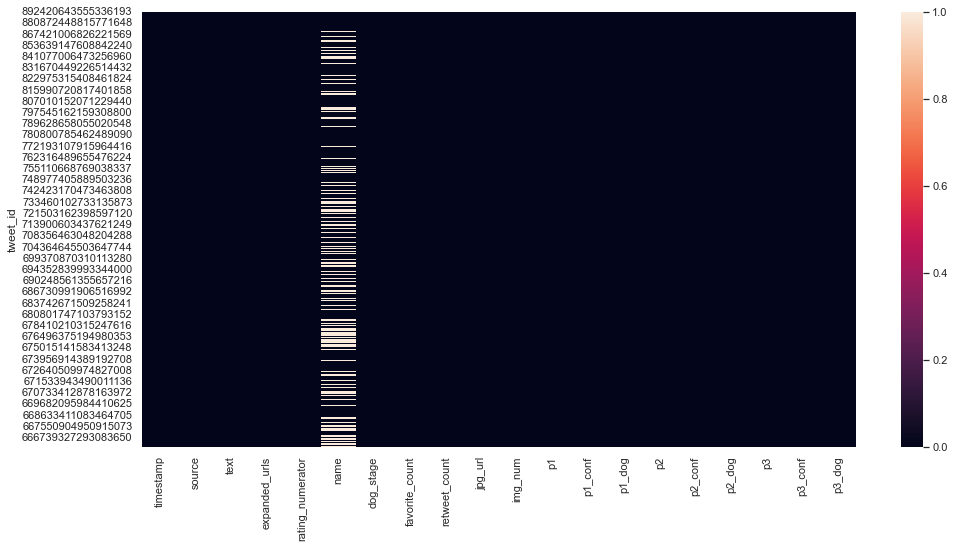

In [59]:
sns.heatmap(master.isna())

#### Storing DF in csv file

In [60]:
master.to_csv('twitter_archive_master.csv')

##### Test

In [61]:
pd.read_csv('twitter_archive_master.csv')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,normal,33702,6976,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,normal,29231,5278,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,normal,21975,3466,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,normal,36778,7190,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,normal,35164,7723,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,NaN,normal,88,36,...,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2053,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,NaN,normal,245,115,...,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2054,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,NaN,normal,100,36,...,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2055,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,NaN,normal,112,39,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


<h1> Analyzing and Visualizing Data

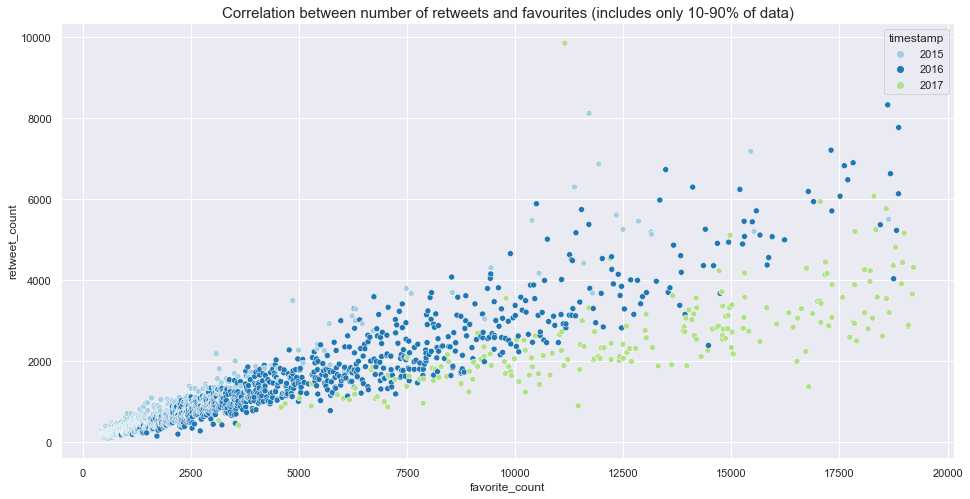

In [62]:
top90 = int(round(len(master)*10/100,0)) 
bottom90 = int(round(len(master)*90/100,0)) 
df = master.sort_values(by='favorite_count')[top90:bottom90]

p = sns.scatterplot(x='favorite_count', y='retweet_count', hue=pd.DatetimeIndex(df['timestamp']).year, data=df, palette="Paired")
plt.title('Correlation between number of retweets and favourites (includes only 10-90% of data)', size= 15)
plt.savefig('scatterplot.png')

##### Insights
1. Clear linear correlation between retweets and favourites
1. Newer tweets tend to get more favourites

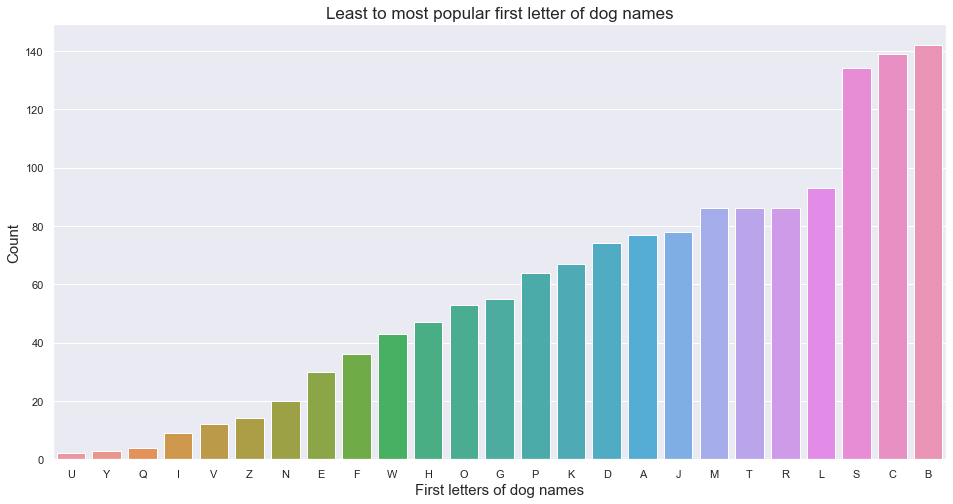

In [63]:
# lets see on what is the most popular letter on which dog's names start
def first_letter(name):
    if not pd.isnull(name):
        return name[0]
    else:
        return name
    
series_letter = master['name'].apply(first_letter).value_counts(ascending=True)
p = sns.barplot(x=series_letter.index, y=series_letter.values)
p.set_xlabel("First letters of dog names", fontsize = 15)
p.set_ylabel("Count", fontsize = 15)
p.set_title('Least to most popular first letter of dog names', fontsize=17)
plt.savefig('barplot.png')

##### Insights
1. People most offen call their pets with first letter S, C or B

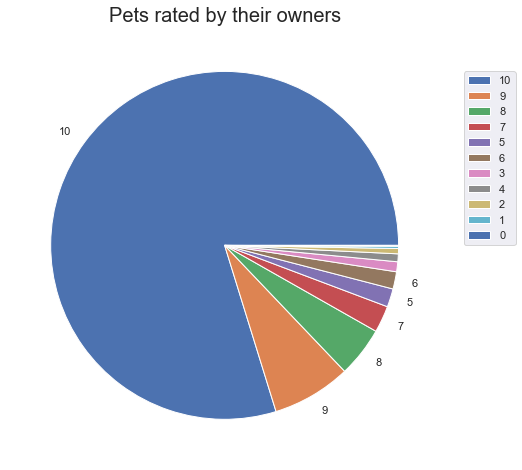

In [64]:
series_numerator = master['rating_numerator'].value_counts()
plt.pie(series_numerator, labels=(list(series_numerator.index[:6])+['']*5))
plt.legend(series_numerator.index, bbox_to_anchor=(1.05, 0.9), loc='upper left', borderaxespad=0)
plt.title('Pets rated by their owners', size= 20)
plt.savefig('piechart.png')

##### Insights
1. People tend to rate their dogs highly, most of the ratings were 10